In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


c:\Users\ROG STRIX\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ROG STRIX\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ROG STRIX\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


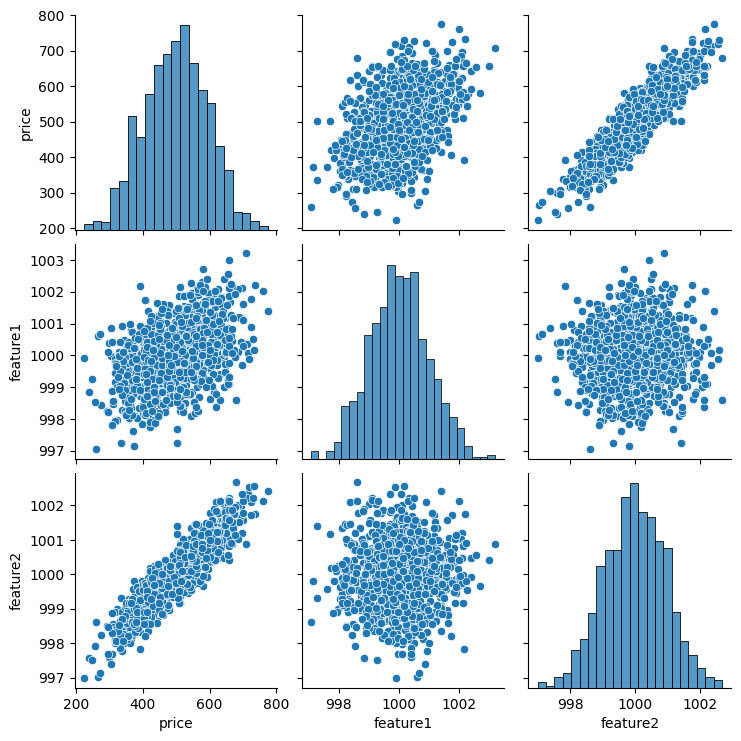

In [3]:
sns.pairplot(df)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Since TensorFlow only works with numpy arrays, we have to convert from pandas DataFrames to NumPy arrays -> .values
X = df[['feature1', 'feature2']].values # Two-dimensional array -> upper case X
y = df['price'].values # One-dimensional vector -> lower case y

In [6]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train.shape

(700, 2)

The next step is to normalize (scale) the data. Because we are working with weights and biases inside a neural network, if we have a large value in our feature set, it could cost error with the weights.

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

We don't need to scale the labels since labels will only be used for comparison with the final results. We only need to scale the features, since they are the only ones being passed through the neural networks.

In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)
# Only fit the training data, not the test data to avoid data leakage (or prior knowledge of the test data)

MinMaxScaler()

In [12]:
# Scale the data so everything falls between 0 and 1
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [14]:
X_train.max()

1.0

In [15]:
X_train.min()

0.0

In [16]:
# Download TensorFlow: pip install tensorflow==2.12.0rc1, uninstall a package: pip uninstall tensorflow
# Check version: import tensorflow as tf, tf.__version__, cmd: pip show tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequentia

In [18]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`, then we create
 |  a `kernel` with shape `(d1, units)`, and the `kernel` operates along axis 2
 |  of the `input`, on every

In [19]:
# Approach 1: Add layers upon your call of Sequential
# Dense: A regular densely-connected NN layer (each neuron is connected to every neuron in the previous layer)
# Parameters: units (number of neurons), activation (str - activation function)
model = Sequential([Dense(4, activation='relu'), # 4 neurons, ReLU activation function
                    Dense(2, activation='relu'),
                    # Dense(2, activation='sigmoid'), # sigmoid activation function
                    Dense(1)]) # Output layer

In [20]:
# Approach 2: Add layers using .add() (preferred)
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1)) # Output layer: make sure it matches our tasks

# Optimizer: How to perform gradient descent (rmsprop, adam, etc.), loss: How to calculate the error
model.compile(optimizer='rmsprop', loss='mse')


In [21]:
"""
## Choosing an optimizer and loss
# For a multi-class classification problem
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop', loss='mse')
"""

"\n## Choosing an optimizer and loss\n# For a multi-class classification problem\nmodel.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])\n\n# For a binary classification problem\nmodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])\n\n# For a mean squared error regression problem\nmodel.compile(optimizer='rmsprop', loss='mse')\n"

In [22]:
# Parameters: epochs - number of passes through the data, verbose - how much output to display
model.fit(x=X_train, y=y_train, epochs=250, verbose=1)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 256648.6094
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256545.2344
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256430.7656
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256295.2500
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256137.2969
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255953.8438
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255745.2344
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255509.4844
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 255242.6094
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254942.9219
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254604.7031
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

In [23]:
loss = pd.DataFrame(model.history.history)
loss.head()

,loss
0,256648.609375
1,256545.234375
2,256430.765625
3,256295.250000
4,256137.296875


<AxesSubplot: >

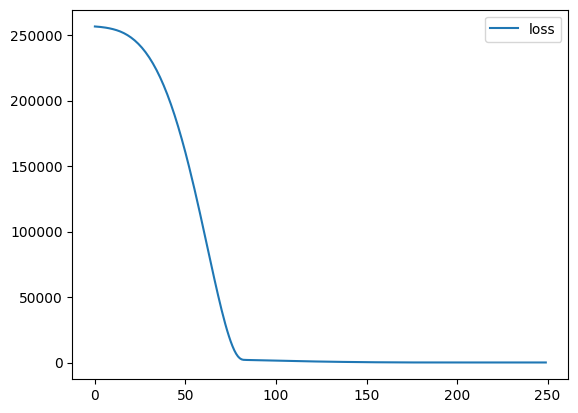

In [24]:
loss.plot()

## Evaluations

In [26]:
# Returns the loss value and metrics values for the model
model.evaluate(X_test, y_test, verbose=0)

25.08898162841797

In [27]:
model.evaluate(X_train, y_train, verbose=0)


23.730161666870117

In [34]:
test_predictions = model.predict(X_test)
test_predictions

10/10 [==============================] - 0s 889us/step


array([[405.47543],
       [623.92126],
       [592.4913 ],
       [572.548  ],
       [366.7411 ],
       [579.5173 ],
       [515.3112 ],
       [459.35214],
       [549.5468 ],
       [447.75607],
       [612.1576 ],
       [549.28674],
       [419.29605],
       [409.0526 ],
       [651.6761 ],
       [437.52133],
       [508.75266],
       [660.3235 ],
       [662.9907 ],
       [565.8778 ],
       [334.33606],
       [445.05356],
       [382.68182],
       [378.9182 ],
       [566.9241 ],
       [610.9486 ],
       [532.68695],
       [428.0689 ],
       [655.83923],
       [414.28564],
       [442.8659 ],
       [485.38568],
       [438.63205],
       [682.2706 ],
       [424.97855],
       [417.87207],
       [502.2285 ],
       [550.79395],
       [509.9929 ],
       [395.50906],
       [618.9747 ],
       [416.83228],
       [604.81915],
       [446.20126],
       [502.2615 ],
       [582.0892 ],
       [669.4453 ],
       [490.6757 ],
       [318.69916],
       [485.68283],


In [35]:
test_predictions = pd.Series(test_predictions.reshape(300,)) # Reshape to a pandas Series
test_predictions

0      405.475433
1      623.921265
2      592.491272
3      572.547974
4      366.741089
          ...    
295    529.330017
296    515.572754
297    610.023865
298    417.163666
299    411.056366
Length: 300, dtype: float32

In [41]:
pred_df = pd.DataFrame(y_test, columns=['Test Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test Y', 'Model Predictions']
pred_df.head()

,Test Y,Model Predictions
0,402.296319,405.475433
1,624.156198,623.921265
2,582.455066,592.491272
3,578.588606,572.547974
4,371.224104,366.741089


<AxesSubplot: xlabel='Test Y', ylabel='Model Predictions'>

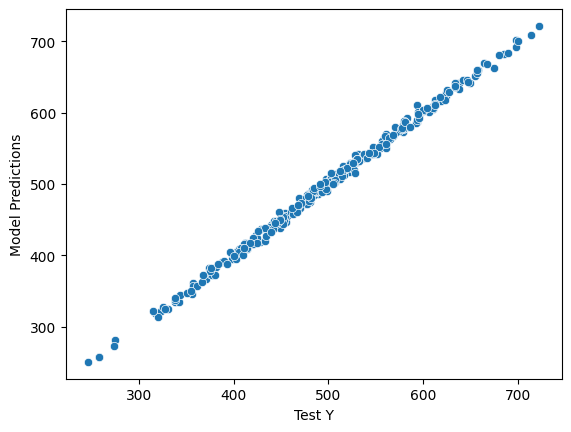

In [42]:
sns.scatterplot(x='Test Y', y='Model Predictions', data=pred_df)

c:\Users\ROG STRIX\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


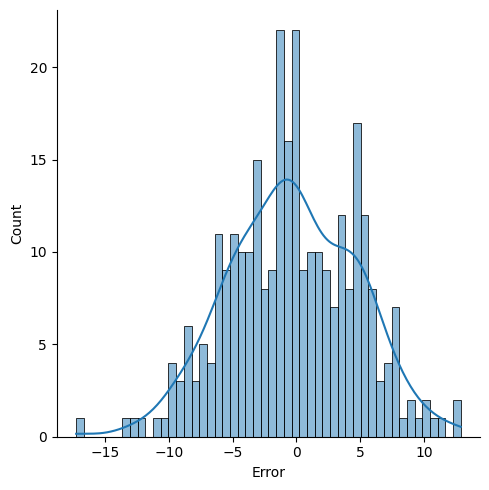

In [49]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']
sns.displot(pred_df['Error'],bins=50,kde=True)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
# Mean absolute error (MAE): Average of the absolute differences between predictions and actual values
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])
# On average, our predictions are off by $4

4.016187443862351

In [57]:
# Mean squared error (MSE): Average of the squared differences between predictions and actual values
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions']) # Similar to the evaluation loss

25.08898328482432

In [59]:
# Root mean squared error (RMSE): Square root of the MSE
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])**0.5

5.008890424517622

## Predict on brand new data

In [60]:
new_gem = [[998, 1000]]

In [61]:
# Scale the new data
new_gem = scaler.transform(new_gem)
new_gem

array([[0.14117652, 0.53968792]])

In [62]:
model.predict(new_gem)

1/1 [==============================] - 0s 34ms/step


array([[419.86072]], dtype=float32)

## Saving and Loading 

In [63]:
from tensorflow.keras.models import load_model

In [66]:
model.save('my_gem_model.h5')

In [68]:
import h5py

In [71]:
file = h5py.File('my_gem_model.h5', 'r')
later_model = load_model(file)

In [72]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 132ms/step


array([[419.86072]], dtype=float32)

In [73]:
file.close()